# Eval performance of pre-trained LLMs

In [1]:
import sys, os
sys.path.append(os.path.abspath("../"))

In [35]:
import importlib
import load_llm.load_llm
import eval_llm.eval_perplexity
importlib.reload(load_llm.load_llm)
importlib.reload(eval_llm.eval_perplexity)

from load_llm.load_llm import LLMPretrained, LLMWrapper
import pandas as pd
import time
from tqdm import tqdm
import seaborn as sns
from eval_llm.eval_perplexity import eval_perplexity
from datasets import load_dataset

In [9]:
llm_pretraineds = [llm_pre for llm_pre in LLMPretrained if llm_pre != LLMPretrained.GPT2_XL]
llm_pretraineds

[<LLMPretrained.GPT2_SMALL: 'distilgpt2'>,
 <LLMPretrained.GPT2_BASE: 'gpt2'>,
 <LLMPretrained.GPT2_MEDIUM: 'gpt2-medium'>,
 <LLMPretrained.GPT2_LARGE: 'gpt2-large'>,
 <LLMPretrained.GPT_NEO_SMALL: 'EleutherAI/gpt-neo-125M'>,
 <LLMPretrained.GPT_NEO_LARGE: 'EleutherAI/gpt-neo-1.3B'>,
 <LLMPretrained.FLAN_SMALL: 'google/flan-t5-small'>,
 <LLMPretrained.FLAN_BASE: 'google/flan-t5-base'>]

### Eval time performance for generation task

In [5]:
def time_generation(model : LLMWrapper, prompt : str, text_length : int) -> float:
    start = time.time()
    model.generate_text(prompt, max_length=text_length, verbose=False)
    return time.time() - start

In [44]:
text_size = [5, 10, 50, 100]
prompt = "Once upon a time"
print("Begin")
data = {
    llm.value: [
        time_generation(model=LLMWrapper(llm, verbose=False), prompt=prompt, text_length=length)
        for length in tqdm(text_size, desc="Generated length size")
    ]
    for llm in tqdm(llm_pretraineds, desc="llm_pretraineds")
}
data

Begin































Generated length size: 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]





























Generated length size: 100%|██████████| 4/4 [00:10<00:00,  2.55s/it]





























Generated length size: 100%|██████████| 4/4 [00:21<00:00,  5.35s/it]





























Generated length size: 100%|██████████| 4/4 [00:39<00:00,  9.99s/it]





























Generated length size: 100%|██████████| 4/4 [00:12<00:00,  3.24s/it]









Generated length size:  50%|█████     | 2/4 [01:58<01:58, 59.39s/it]




















Generated length size: 100%|██████████| 4/4 [00:48<00:00, 12.16s/it]




Generated length size: 100%|██████████| 4/4 [00:06<00:00,  1.70s/it]




Generated length size: 100%|██████████| 4/4 [00:07<00:00,  1.94s/it]




llm_pretraineds: 100%|██████████| 8/8 [02:35<00:00, 19.43s/it]


{'distilgpt2': [0.039441585540771484,
  0.1317586898803711,
  0.9750914573669434,
  2.220196008682251],
 'gpt2': [0.047057151794433594,
  0.2238309383392334,
  1.4217071533203125,
  3.225576162338257],
 'gpt2-medium': [0.12324690818786621,
  0.6531651020050049,
  3.8550896644592285,
  9.520621061325073],
 'gpt2-large': [0.2868008613586426,
  1.2216246128082275,
  8.507774829864502,
  19.31953501701355],
 'EleutherAI/gpt-neo-125M': [0.5275752544403076,
  0.24811744689941406,
  1.3794124126434326,
  3.448385000228882],
 'EleutherAI/gpt-neo-1.3B': [4.933258533477783,
  1.733971118927002,
  12.872544288635254,
  24.03103280067444],
 'google/flan-t5-small': [0.34525203704833984,
  0.15761542320251465,
  0.34002232551574707,
  0.846975564956665],
 'google/flan-t5-base': [1.0000483989715576,
  0.6359002590179443,
  0.6769366264343262,
  0.3310704231262207]}

In [45]:
df = pd.DataFrame(data=data, index=text_size)
df

,distilgpt2,gpt2,gpt2-medium,gpt2-large,EleutherAI/gpt-neo-125M,EleutherAI/gpt-neo-1.3B,google/flan-t5-small,google/flan-t5-base
5,0.039442,0.047057,0.123247,0.286801,0.527575,4.933259,0.345252,1.000048
10,0.131759,0.223831,0.653165,1.221625,0.248117,1.733971,0.157615,0.635900
50,0.975091,1.421707,3.855090,8.507775,1.379412,12.872544,0.340022,0.676937
100,2.220196,3.225576,9.520621,19.319535,3.448385,24.031033,0.846976,0.331070


<Axes: xlabel='Number of word generated', ylabel='Generation duraction (in seconds)'>

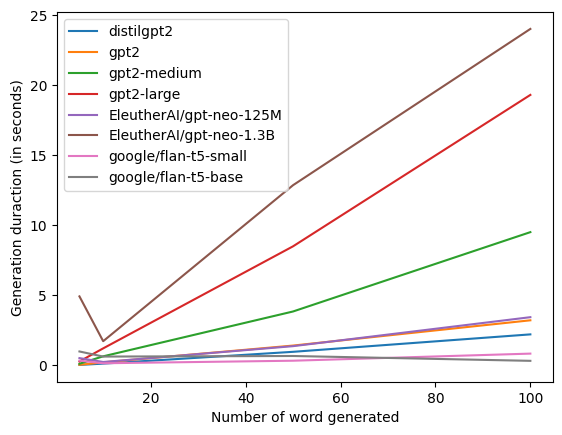

In [47]:
df.plot(
    kind="line",
    xlabel="Number of word generated",
    ylabel="Generation duraction (in seconds)",
)

### Eval number of parameters

In [12]:
data_nb_par = {
    "Nb parameters": [LLMWrapper(llm, verbose=False).nb_parameters for llm in tqdm(llm_pretraineds)],
    "Model" : [llm.value for llm in llm_pretraineds]
}
data_nb_par

100%|██████████| 8/8 [00:16<00:00,  2.05s/it]


{'Nb parameters': [81912576,
  124439808,
  354823168,
  774030080,
  125198592,
  1315575808,
  76961152,
  247577856],
 'Model': ['distilgpt2',
  'gpt2',
  'gpt2-medium',
  'gpt2-large',
  'EleutherAI/gpt-neo-125M',
  'EleutherAI/gpt-neo-1.3B',
  'google/flan-t5-small',
  'google/flan-t5-base']}

In [13]:
df_nb_par = pd.DataFrame(data=data_nb_par)
df_nb_par

,Nb parameters,Model
0,81912576,distilgpt2
1,124439808,gpt2
2,354823168,gpt2-medium
3,774030080,gpt2-large
4,125198592,EleutherAI/gpt-neo-125M
5,1315575808,EleutherAI/gpt-neo-1.3B
6,76961152,google/flan-t5-small
7,247577856,google/flan-t5-base


<Axes: xlabel='Nb parameters', ylabel='Model'>

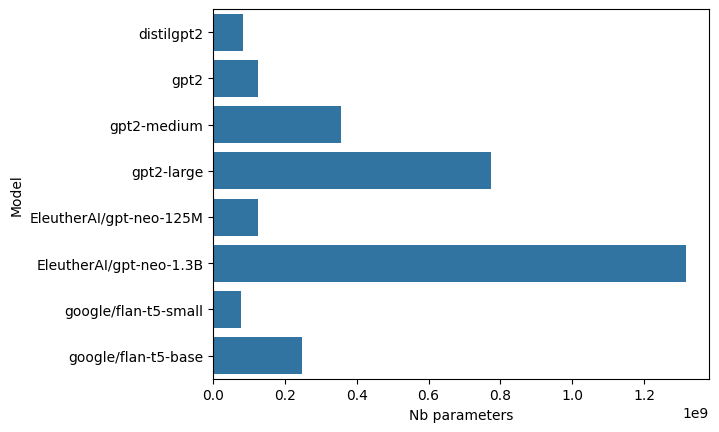

In [14]:
sns.barplot(
    y="Model",
    x="Nb parameters",
    data=df_nb_par,
    orient="h",
)

### Eval perplexity

In [15]:
test_data = load_dataset("wikitext", "wikitext-2-raw-v1", split="test")
small_test_data = test_data.select(range(100))  # Select the first 100 entries
print(test_data)
print(small_test_data)

Dataset({
    features: ['text'],
    num_rows: 4358
})
Dataset({
    features: ['text'],
    num_rows: 100
})


In [39]:
ppls = [
    eval_perplexity(
        tokenizer=model.tokenizer,
        model=model.model,
        text_input=small_test_data["text"],
        max_context_length=model.get_max_context_length(),
        verbose=False,
    )
    for llm in tqdm(llm_pretraineds, desc="llm_pretraineds")
    if (model := LLMWrapper(llm_pretrained=llm, verbose=False))
]
data_ppl = {
    "Perplexity": ppls,
    "Model": [gpt2_size.value for gpt2_size in llm_pretraineds],
}
data_ppl





















Compute perplexity:  83%|████████▎ | 5/6 [00:04<00:00,  1.03it/s]




















Compute perplexity:  83%|████████▎ | 5/6 [00:10<00:02,  2.19s/it]




















Compute perplexity:  83%|████████▎ | 5/6 [00:31<00:06,  6.24s/it]




















Compute perplexity:  83%|████████▎ | 5/6 [01:02<00:12, 12.46s/it]











Compute perplexity:  67%|██████▋   | 2/3 [00:17<00:08,  8.83s/it]











Compute perplexity:  67%|██████▋   | 2/3 [02:01<01:00, 60.75s/it]


Compute perplexity:  92%|█████████▏| 12/13 [00:08<00:00,  1.44it/s]


Compute perplexity:  92%|█████████▏| 12/13 [00:23<00:01,  1.96s/it]


llm_pretraineds: 100%|██████████| 8/8 [04:57<00:00, 37.22s/it]


{'Perplexity': [47.86258316040039,
  32.937129974365234,
  24.510807037353516,
  22.85206413269043,
  26.925771713256836,
  14.9249906539917,
  1.2489715814590454,
  1.2978955507278442],
 'Model': ['distilgpt2',
  'gpt2',
  'gpt2-medium',
  'gpt2-large',
  'EleutherAI/gpt-neo-125M',
  'EleutherAI/gpt-neo-1.3B',
  'google/flan-t5-small',
  'google/flan-t5-base']}

In [40]:
df_ppl = pd.DataFrame(data=data_ppl)
df_ppl

,Perplexity,Model
0,47.862583,distilgpt2
1,32.937130,gpt2
2,24.510807,gpt2-medium
3,22.852064,gpt2-large
4,26.925772,EleutherAI/gpt-neo-125M
5,14.924991,EleutherAI/gpt-neo-1.3B
6,1.248972,google/flan-t5-small
7,1.297896,google/flan-t5-base


<Axes: xlabel='Perplexity', ylabel='Model'>

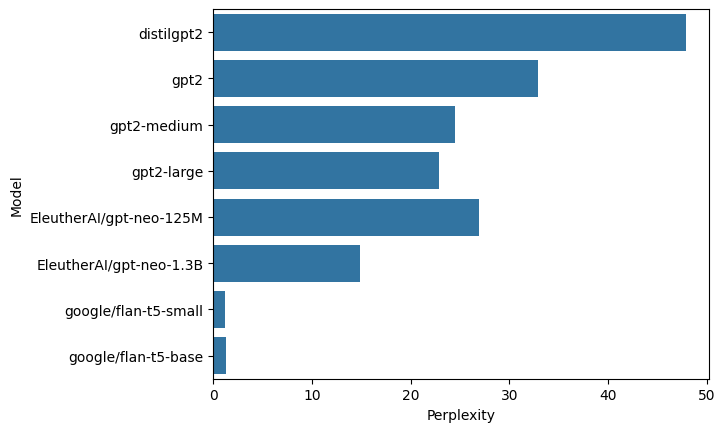

In [41]:
sns.barplot(
    y="Model",
    x="Perplexity",
    data=df_ppl,
    orient="h",
)